<a href="https://colab.research.google.com/github/KhamdGek/ML-W-PYTHON/blob/master/ML_assignment1.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> #    **DESCISION TREE VS. RANDOM FOREST ON Car Evaluation Data Set**




# Objective

Data is to be imported from UCI ML repository for Car evaluation Datasheet.  The Datasheet is to be shuffled and stored in three different arrays. Descision Tree Classifier and Random Forest classifer are to be applied on theses three data array which are shuffled. EAch result is sumed and averaged to get the accuracy of the model and train/test set. Finally, confision matrix and classification matrix are applied and T-test. 

# **LIBRARY IMPORT**

In [1]:
import pandas as pd #importing panda library
import numpy as np #importing numpy library
import matplotlib.pyplot as plt  #imporitng matplot libraay for data visualisation
import seaborn as sns    #seaborn for data visualisation
sns.set()
import io
import random
from random import shuffle #importing shuffle to randomly shuffle the datasheet
from sklearn.model_selection import train_test_split # for data splitting 70%/30%
from sklearn.tree import DecisionTreeClassifier # import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier # import Random Forest classifier
from sklearn.metrics import confusion_matrix #for printing and display of confusion matrix
from sklearn.metrics import classification_report #for printing and display of classification report
from sklearn.metrics import accuracy_score #used for model accuracy calculation
import warnings
warnings.filterwarnings('ignore')
!pip install category_encoders 
import category_encoders as ce # import category encoders for converting objective data to int for futher processing



     |████████████████████████████████| 81kB 4.0MB/s 


# **DATA IMPORT**

In [2]:
from google.colab import files
uploaded = files.upload()


Saving car.csv to car.csv


# **DATA CLEANING**

1. REMOVING SOME NON IMPORTANT COLOMNS. 
2. SPLITTING THE DATA INTO TRAIN TEST WITH 70/30
3. RANDOM SHUFFLING THE DATA AND STORING INTO THREE STIRNGS

In [3]:
Dataset1 = pd.read_csv(io.BytesIO(uploaded['car.csv']))
Dataset1.shape #view the data rows and colmns

(1728, 7)

In [6]:
Dataset1.drop(Dataset1.columns[9:],axis=1,inplace=True)
col_names = ['BUYING', 'MAINT', 'DOORS', 'PERSONS', 'LUG_BOOT', 'SAFETY', 'CLASS'] #setting colomn names as given in data description
Dataset1.columns = col_names 
col_names
Dataset1.head() 

,BUYING,MAINT,DOORS,PERSONS,LUG_BOOT,SAFETY,CLASS
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
Dataset1['CLASS'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: CLASS, dtype: int64

# **DATA SHUFFLING**

In [8]:
Dataset1.isnull().sum() # check missing values in variables

#Shuffling Dataset 1 and viewing
shuffled_Dataset = Dataset1.sample(frac=1)
shuffled_Dataset.to_csv("car1.csv", index=False)
Dataset1=pd.read_csv("car1.csv")
#Shuffling Dataset 2 and viewing
shuffled_Dataset2 = Dataset1.sample(frac=1)
shuffled_Dataset2.to_csv("car2.csv", index=False)
Dataset2=pd.read_csv("car2.csv")
#Shuffling Dataset 3 and viewing
shuffled_Dataset3 = Dataset1.sample(frac=1)
shuffled_Dataset3.to_csv("car3.csv", index=False)
Dataset3=pd.read_csv("car3.csv")


In [9]:
Dataset1.head()

,BUYING,MAINT,DOORS,PERSONS,LUG_BOOT,SAFETY,CLASS
0,vhigh,low,5more,2,small,high,unacc
1,low,low,4,2,big,med,unacc
2,med,low,5more,more,med,med,good
3,med,high,4,more,small,med,unacc
4,vhigh,med,5more,more,med,low,unacc


In [10]:
Dataset2.head()

,BUYING,MAINT,DOORS,PERSONS,LUG_BOOT,SAFETY,CLASS
0,med,med,4,more,small,high,acc
1,med,med,5more,4,big,low,unacc
2,low,med,2,more,big,high,vgood
3,vhigh,low,4,2,small,high,unacc
4,low,vhigh,2,4,med,high,acc


In [11]:
Dataset3.head()

,BUYING,MAINT,DOORS,PERSONS,LUG_BOOT,SAFETY,CLASS
0,high,vhigh,5more,2,big,low,unacc
1,high,vhigh,2,2,med,high,unacc
2,high,high,5more,2,small,med,unacc
3,med,low,4,more,small,med,acc
4,vhigh,vhigh,2,4,small,low,unacc


# **NON-IMPORTANT COLOMN REMOVAL TO IMPROVE ACCURACY**

In [12]:
#adding Class as output for prediction and true value in all datasets
X = Dataset1.drop(['CLASS',], axis=1)
y = Dataset1['CLASS']

In [13]:
X2 = Dataset2.drop(['CLASS'], axis=1)
y2 = Dataset2['CLASS']

In [14]:
X3 = Dataset3.drop(['CLASS'], axis=1)
y3 = Dataset3['CLASS']

# **TRAIN/TEST SPLIT INTO 70/30 RATIO**

In [15]:
# splitting the data in 70% as training and 30% as testing for Dataset 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [16]:
# splitting the data in 70% as training and 30% as testing for Dataset 2
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.30, random_state = 42)
X_train2.shape, X_test2.shape

((1209, 6), (519, 6))

In [17]:
# splitting the data in 70% as training and 30% as testing for Dataset 3
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.30, random_state = 42)
X_train3.shape, X_test3.shape

((1209, 6), (519, 6))

In [18]:
X_train3.head()

,BUYING,MAINT,DOORS,PERSONS,LUG_BOOT,SAFETY
1178,vhigh,low,4,more,med,high
585,high,vhigh,2,2,med,low
1552,med,med,2,4,med,med
1169,high,vhigh,3,more,small,high
1033,high,low,4,more,big,low


# **CONVERSION OF STING TO INT IN DATA**

In [19]:
# Encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['BUYING', 'MAINT', 'PERSONS', 'LUG_BOOT', 'SAFETY','DOORS'])
#encoding objective data to int data in all the splits done
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

X_train2 = encoder.fit_transform(X_train2)
X_test2 = encoder.transform(X_test2)

X_train3 = encoder.fit_transform(X_train3)
X_test3 = encoder.transform(X_test3)

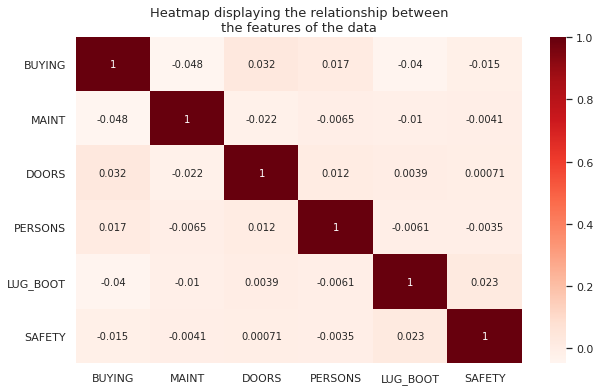

In [20]:
# Let's visualize the relationships between the car evaluation of a car and the other features. 
plt.figure(figsize=(10,6))
sns.heatmap(X_train.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between\nthe features of the data',fontsize=13)
plt.show()

# **Decision Tree Classifier**

# Decision Tree Classifier **MODEL FITTING**

In [21]:
# instantiate the DecisionTreeClassifier model with criterion entropy index
DTC_ENT = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)  #Max depth of 10 is set after multiple attempt to find max possbile accurate model
# fit the model
DTC_ENT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [22]:
# instantiate the DecisionTreeClassifier model with criterion entropy index
DTC_ENT2 = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0) #Max depth of 10 is set after multiple attempt to find max possbile accurate model
# fit the model
DTC_ENT2.fit(X_train2, y_train2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [23]:
# instantiate the DecisionTreeClassifier model with criterion entropy index
DTC_ENT3 = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0) #Max depth of 10 is set after multiple attempt to find max possbile accurate model
# fit the model
DTC_ENT3.fit(X_train3, y_train3)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [24]:
y_pred_gini = DTC_ENT.predict(X_test) #Prediciting using the test data for model 1
y_pred_train_gini = DTC_ENT.predict(X_train) #Prediciting using the train data for model 1

y_pred_gini2 = DTC_ENT2.predict(X_test2) #Prediciting using the test data for model 2
y_pred_train_gini2 = DTC_ENT2.predict(X_train2) #Prediciting using the train data for model 2
 
y_pred_gini3 = DTC_ENT3.predict(X_test3) #Prediciting using the test data for model 3
y_pred_train_gini3 = DTC_ENT3.predict(X_train3) #Prediciting using the train data for model 3


In [25]:
# Print the Confusion Matrix and slice it into four pieces
cm = confusion_matrix(y_test, y_pred_gini)
print('Confusion matrix\n\n', cm) #for model 1 Descision tree

Confusion matrix

 [[ 92   2   2   1]
 [  7  12   0   0]
 [  6   0 375   0]
 [  2   1   0  19]]


In [26]:
cm = confusion_matrix(y_test2, y_pred_gini2)
print('Confusion matrix\n\n', cm)  #for model 2 Descision tree

Confusion matrix

 [[108   2   8   1]
 [  1  13   0   1]
 [  9   0 360   0]
 [  2   0   0  14]]


In [27]:
cm = confusion_matrix(y_test3, y_pred_gini3)
print('Confusion matrix\n\n', cm)  #for model 3 Descision tree

Confusion matrix

 [[107   3   8   2]
 [  4  19   1   0]
 [ 10   1 348   0]
 [  0   4   0  12]]


# **CLASSIFICATION REPORT** FOR DESCISION TREE

In [28]:
#for model 1 Descision tree
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

         acc       0.86      0.95      0.90        97
        good       0.80      0.63      0.71        19
       unacc       0.99      0.98      0.99       381
       vgood       0.95      0.86      0.90        22

    accuracy                           0.96       519
   macro avg       0.90      0.86      0.88       519
weighted avg       0.96      0.96      0.96       519



In [29]:
#for model 2 Descision tree
print(classification_report(y_test2, y_pred_gini2))

              precision    recall  f1-score   support

         acc       0.90      0.91      0.90       119
        good       0.87      0.87      0.87        15
       unacc       0.98      0.98      0.98       369
       vgood       0.88      0.88      0.88        16

    accuracy                           0.95       519
   macro avg       0.90      0.91      0.91       519
weighted avg       0.95      0.95      0.95       519



In [30]:
#for model 3 Descision tree
print(classification_report(y_test3, y_pred_gini3))

              precision    recall  f1-score   support

         acc       0.88      0.89      0.89       120
        good       0.70      0.79      0.75        24
       unacc       0.97      0.97      0.97       359
       vgood       0.86      0.75      0.80        16

    accuracy                           0.94       519
   macro avg       0.85      0.85      0.85       519
weighted avg       0.94      0.94      0.94       519



# **RANDOM FOREST CLASSIFIER**

Random Forest is essentially a collection of Decision Trees. A decision tree is built on an entire dataset, using all the features/variables of interest, whereas a random forest randomly selects observations/rows and specific features/variables to build multiple decision trees from and then averages the results. After a large number of trees are built using this method, each tree "votes" or chooses the class, and the class receiving the most votes by a simple majority is the "winner" or predicted class.

# RANDOM FOREST **MODEL FITTING**

In [31]:

rfc = RandomForestClassifier(n_estimators=100,max_depth=13,random_state=0,min_samples_split=2) # instantiate the random forest classifier  with max depth of 13 and n estimator of 100
rfc.fit(X_train, y_train) # fit the model 1
y_pred = rfc.predict(X_test) # Predict the Test set results

rfc2 = RandomForestClassifier(n_estimators=100,max_depth=13,random_state=0, min_samples_split=2) # instantiate the random forest classifier  with max depth of 13 and n estimator of 100
rfc2.fit(X_train2, y_train2)# fit the model 2
y_pred2 = rfc2.predict(X_test2) # Predict the Test set results

rfc3 = RandomForestClassifier(n_estimators=100,max_depth=13,random_state=0, min_samples_split=2) # instantiate the random forest classifier  with max depth of 13 and n estimator of 100
rfc3.fit(X_train3, y_train3)# fit the model 3
y_pred3 = rfc3.predict(X_test3) # Predict the Test set results


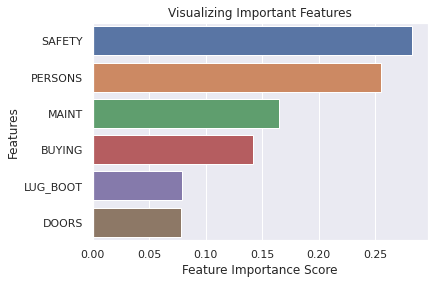

In [32]:
## EXTRA TASK JUST TO SEE THE USE OF SEABORN FOR IMORTANT FEATURE EXTRACTION
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores
sns.barplot(x=feature_scores, y=feature_scores.index) # Creating a seaborn bar plot
plt.xlabel('Feature Importance Score') # Add labels to the graph
plt.ylabel('Features')
plt.title("Visualizing Important Features")# Add title to the graph
plt.show()# Visualize the graph

# **CONFUSION MATRIX** OF RANDOM FOREST

In [33]:
cm4 = confusion_matrix(y_test, y_pred) 
print('Confusion matrix\n\n', cm4) #for model 1 random forest

Confusion matrix

 [[ 93   1   2   1]
 [  9   9   0   1]
 [  5   0 376   0]
 [  2   0   0  20]]


In [34]:
cm5 = confusion_matrix(y_test2, y_pred2)
print('Confusion matrix\n\n', cm5) #for model 2 random forest

Confusion matrix

 [[114   3   2   0]
 [  1  14   0   0]
 [ 12   0 357   0]
 [  2   0   0  14]]


In [35]:
cm6 = confusion_matrix(y_test3, y_pred3)
print('Confusion matrix\n\n', cm6) #for model 3 random forest

Confusion matrix

 [[109   3   6   2]
 [  9  13   0   2]
 [ 13   1 345   0]
 [  0   1   0  15]]


# **CLASSIFICATION REPORT** FOR RANDOM FOREST

In [36]:
print(classification_report(y_test, y_pred)) #for model 1 random forest

              precision    recall  f1-score   support

         acc       0.85      0.96      0.90        97
        good       0.90      0.47      0.62        19
       unacc       0.99      0.99      0.99       381
       vgood       0.91      0.91      0.91        22

    accuracy                           0.96       519
   macro avg       0.91      0.83      0.86       519
weighted avg       0.96      0.96      0.96       519



In [37]:
print(classification_report(y_test2, y_pred2)) #for model 2 random forest

              precision    recall  f1-score   support

         acc       0.88      0.96      0.92       119
        good       0.82      0.93      0.87        15
       unacc       0.99      0.97      0.98       369
       vgood       1.00      0.88      0.93        16

    accuracy                           0.96       519
   macro avg       0.93      0.93      0.93       519
weighted avg       0.96      0.96      0.96       519



In [38]:
print(classification_report(y_test3, y_pred3)) #for model 3 random forest

              precision    recall  f1-score   support

         acc       0.83      0.91      0.87       120
        good       0.72      0.54      0.62        24
       unacc       0.98      0.96      0.97       359
       vgood       0.79      0.94      0.86        16

    accuracy                           0.93       519
   macro avg       0.83      0.84      0.83       519
weighted avg       0.93      0.93      0.93       519



# **CONCLUSION**
Comparing the results of both Descision Tree and Random Forest. 
Descision tree gives same accuracy as Random Forest model accuacy but Random forest also showed promising result in train set accuracy compared to descision tree classifier.

In [39]:
number_list1 = [DTC_ENT.score(X_train, y_train),DTC_ENT2.score(X_train2, y_train2),DTC_ENT3.score(X_train3, y_train3)] #summing the test accuracy of model 1,2,3
avg_train = sum(number_list1)/len(number_list1) #average train acc for model 1,2,3
print("The average Train set score for Descision tree is ", round(avg_train,2))
number_list2 = [DTC_ENT.score(X_test, y_test),DTC_ENT2.score(X_test2, y_test2),DTC_ENT3.score(X_test3, y_test3)]
avg_test = sum(number_list2)/len(number_list2) #average test acc for model 1,2,3
print("The average Test set score for Descision tree is ", round(avg_test,2))
number_list3 = [accuracy_score(y_test, y_pred_gini),accuracy_score(y_test2, y_pred_gini2),accuracy_score(y_test3, y_pred_gini3)]
avg_model = sum(number_list3)/len(number_list3) #average acc for model 1,2,3
print("The average overall model accuracy score for Descision tree is ", round(avg_model,2))

The average Train set score for Descision tree is  0.98
The average Test set score for Descision tree is  0.95
The average overall model accuracy score for Descision tree is  0.95


In [40]:
number_list4 = [rfc.score(X_train, y_train),rfc2.score(X_train2, y_train2),rfc3.score(X_train3, y_train3)] #summing the test accuracy of model 1,2,3
avg_train = sum(number_list4)/len(number_list4) #average train acc for model 1,2,3
print("The average Train set score for Random Forest is ", round(avg_train,2))
number_list5 = [rfc.score(X_test, y_test),rfc2.score(X_test2, y_test2),rfc3.score(X_test3, y_test3)]
avg_test = sum(number_list5)/len(number_list5) #average test acc for model 1,2,3
print("The average Test set score for Random forest is ", round(avg_test,2))
number_list6 = [accuracy_score(y_test, y_pred),accuracy_score(y_test2, y_pred2),accuracy_score(y_test3, y_pred3)]
avg_model = sum(number_list6)/len(number_list6) #average acc for model 1,2,3
print("The average overall model accuracy score for random forest is ", round(avg_model,2))

The average Train set score for Random Forest is  1.0
The average Test set score for Random forest is  0.95
The average overall model accuracy score for random forest is  0.95


# **T-TEST**

T-test for Model Accuracy Ttest_relResult(statistic=0.0, pvalue=1.0)


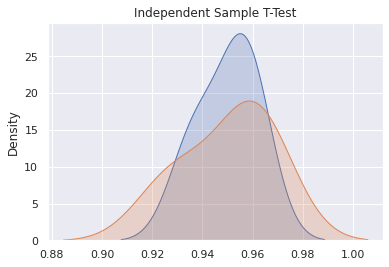

In [42]:
#T-test
#statisticfloat or array
##The calculated t-statistic.

#pvaluefloat or array
##The two-tailed p-value

import numpy as np
from scipy import stats
sns.kdeplot(number_list3, shade=True)
sns.kdeplot(number_list6, shade=True)
plt.title("Paired Sample T-Test")
print("T-test for Model Accuracy",stats.ttest_rel(number_list3,number_list6))

The Blue distribtuion represents that of Descision Tree classsfier and Red distribution represents that of Random Forest classifier.

# **Reference**
1. https://www.kaggle.com/elikplim/car-evaluation-data-set

2. https://archive.ics.uci.edu/ml/datasets/car+evaluation

3. https://www.hackdeploy.com/python-t-test-a-friendly-guide/